<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование рынка недвижимости на примере данных сервиса Яндекс Недвижимость

Для анализа имеются данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача исследования — установить параметры, позволяющие определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Изучим данные, применяя методы .head(),info() и .describe()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('real_estate_data.csv',sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
display(pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


### Вывод

Датасет состоит из 23699 строк и 22 столбцов

В столбцах 12 столбцах есть пропущенные значения:

ceiling_height, 

floors_total, 

living_area, 

is_apartment, 

kitchen_area, 

balcony,

locality_name, 

airports_nearest, 

cityCenters_nearest, 

parks_around3000, 

ponds_nearest, 

days_exposition




## Предобработка данных

Приведем название столбца cityCenters_nearest к змеиному регистру.

In [6]:
df.rename(columns={'cityCenters_nearest': 'citycenters_nearest'}, inplace=True)

**ceiling_height - работа с пропусками**

В столбце отсутсвует около 40 % данных. Причиной пропусков может быть незополнение соответсвующих данных продавцами при размещении бъявления (возможно это поле не было обязательным для заполнения). Данных, позволяющих точно определить отсутсвующие значения высоты потолков нет. Поскольку строк с пропусками по этому столбцу около 40% от всего датафрейма, а высота потолков это тот параметр, который потенциально может влиять на стоимость квартиры, то лучшеза полнить пропуски медианным значением. 


In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


In [8]:
df['ceiling_height'].isnull().sum()

0

**floors_total - работа с пропусками**

В датафрейме 86 пропусков в колонке с общей этажностью. Поскольку данных для точного определения количества этажей нет, воспользуемся лучшими доступными данными - заменим пропуски значением этажа, на котором расположена квартира.

In [9]:
df['floors_total']=df['floors_total'].fillna(df['floor'])
df['floors_total'].isnull().sum()

0

**living_area - работа с пропусками**

Заполнить пропуски можно с использованием медианного значения отношения жилой площади к общей

In [10]:
df['living_area']=df['living_area'].fillna(((df['living_area']/df['total_area']).median())*df['total_area'])

In [11]:
df['living_area'].isnull().sum()

0

**is_apartment - работа с пропусками**

В столбце is_apartment заменим пропуски значениями False

In [12]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(value = False)
df['is_apartment'].isnull().sum()

0

In [14]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

**kitchen_area - работа с пропусками**

По аналогии с жилой площадью - вычислим значения в пропущенных ячейках с помощью медианного отношения кухни к общей площади.

In [15]:
df['kitchen_area']=df['kitchen_area'].fillna(((df['kitchen_area']/df['total_area']).median())*df['total_area'])

In [16]:
df['kitchen_area'].isnull().sum()

0

**balcony - работа с пропусками**

Пропуски в столбце balcony вероятнее всего говорят об отсутсвии балкона. Заменим пропуски на 0.

In [17]:
df['balcony'] = df['balcony'].fillna(0) 
df['balcony'].isnull().sum()

0

**locality_name - работа с пропусками**

Узнать населенный пункт не получится, поэтому вместо пропусков вставляем 'unknown'

In [18]:
df['locality_name']=df['locality_name'].fillna('unknown')

In [19]:
df['locality_name'].isnull().sum()

0

**airports_nearest, 
citycenters_nearest, 
parks_around3000,
ponds_around3000,
ponds_nearest,
parks_nearest - работа с пропусками**

Данные, отсутсвующие в столбцах с расстоянием до аэропорта, центра города, пруда, а также о количестве парков поблизости, вероятнее всего не были введены продавцом при размещении объявления.

Их целесообразно заполнить нулями.

In [20]:
df['airports_nearest']=df['airports_nearest'].fillna(0)

In [21]:
df['airports_nearest'].isnull().sum()

0

In [22]:
df['citycenters_nearest']=df['citycenters_nearest'].fillna(0)

In [23]:
df['citycenters_nearest'].isnull().sum()

0

In [24]:
df['parks_around3000']=df['parks_around3000'].fillna(0)

In [25]:
df['parks_around3000'].isnull().sum()

0

In [26]:
df['ponds_around3000']=df['parks_around3000'].fillna(0)

In [27]:
df['ponds_around3000'].isnull().sum()

0

In [28]:
df['ponds_nearest']=df['ponds_nearest'].fillna(0)

In [29]:
df['ponds_nearest'].isnull().sum()

0

In [30]:
df['parks_nearest']=df['ponds_nearest'].fillna(0)

In [31]:
df['parks_nearest'].isnull().sum()

0

**days_exposition - работа с пропусками**

Пропуски в столбце с количеством дней размещения объявления могут быть по причине того, что объявление не было снято на момент выгрузки или вследствии ошибки в базе данных. Заполнять эти пропуски нулями или средним/медианным значением нельзя, поскольку результаты анализа в таком случае могут быть искажены. 

Поэтому оставляем эти пропуски.

**Изменение типов данных**

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 тип данных следует заменить на цельночисловой, поскольку это соответсвует логике содержащихся в них данных

In [32]:
df['floors_total'] = df['floors_total'].astype(int)

In [33]:
df['balcony'] = df['balcony'].astype(int)

In [34]:
df['parks_around3000'] = df['parks_around3000'].astype(int)

In [35]:
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

Приведем столбец first_day_exposition к типу данных datetime.

In [36]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition'].head()


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

**Добавление столбца с ценой квадратного метра**

In [38]:
df['square_meter_price']=df['last_price']/df['total_area']
df['square_meter_price'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: square_meter_price, dtype: float64

**Добавление столбцов с днем недели, месяцем и годом публикации объявления**

In [39]:
df['weekday_exposition']=df['first_day_exposition'].dt.dayofweek
print(df['weekday_exposition'].head())
df['month_exposition']=df['first_day_exposition'].dt.month
print(df['month_exposition'].head())
df['year_exposition']=df['first_day_exposition'].dt.year
print(df['year_exposition'].head())

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64
0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64
0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64


**Добавление столбца с этажем квартиры; варианты — первый, последний, другой**

In [40]:
df['floor_type'] = ['other']*len(df)
df.loc[df['floor'] == 1, 'floor_type'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'last'
df['floor_type'].head()

0    other
1    first
2    other
3    other
4    other
Name: floor_type, dtype: object

**Добавление столбцов с соотношением жилой и общей площади, а также отношением площади кухни к общей**

In [41]:
df['living_area_ratio']=df['living_area']/df['total_area']
df['kitchen_area_ratio']=df['kitchen_area']/df['total_area']
df[['living_area_ratio','kitchen_area_ratio']].head()

,living_area_ratio,kitchen_area_ratio
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.567860,0.172414
4,0.320000,0.410000


In [42]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,living_area_ratio,kitchen_area_ratio
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.671463,34.578214,5.892358,10.491431,0.591080,...,199.114140,0.469049,199.114140,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.565014,0.185919
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595802,22.340665,4.885249,6.029020,0.959298,...,305.188777,0.748534,305.188777,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.101053,0.069512
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.500000,0.136859
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,...,389.000000,1.000000,389.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.631579,0.223717
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,1344.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


## Исследовательский анализ данных

**Исследование площади, цены, числа комнат, высоты потолков, построение гистрограмм, удаление редких и выбивающихся значений**

Создаем функцию для построения диаграмм

In [43]:
def hist(x):
    plt.figure()
    plt.hist(x, edgecolor="black",bins=100)
    plt.grid()
def box (x):
    plt.figure()
    plt.boxplot(x)
    plt.grid()
    


In [44]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

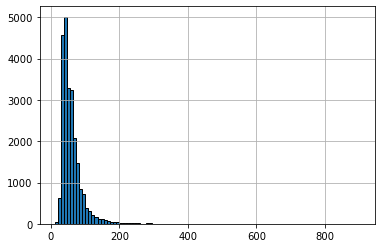

In [45]:
hist(df['total_area'])

Максимальное значение 900 метров сильно отличается от третьего квантиля, что указывает на то, что имеется небольшое количество аномально высоких значений

Создадим дополнительный датафрейм df_adjusted, где будем отсекать редкие и выбивающиеся значения.
С помощью диаграммы boxplot и метода np.nanquantile определим редкие и выбивающиеся значения и отбросим их для того чтобы они не влияли на последующий анализ

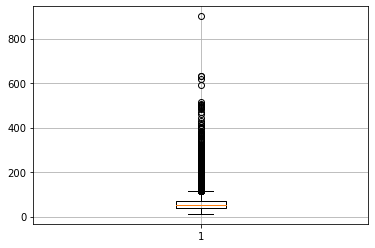

In [46]:
box(df['total_area'])


In [47]:
threshold=np.nanquantile(df['total_area'], 0.99)

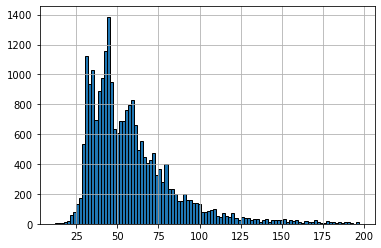

In [48]:
hist(df[df['total_area'] < threshold]['total_area'])


Вероятнее всего значения выше порога - реальные единичные объявления о продаже элитной недвижимости, однако, поскольку такие высокие значения могут повлиять на качество последующего анализа - лучше их отбросить.

In [49]:
df_adjusted=df[df['total_area'] < threshold]


In [50]:
df_adjusted['last_price'].describe()

count    2.346200e+04
mean     6.017209e+06
std      6.217892e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

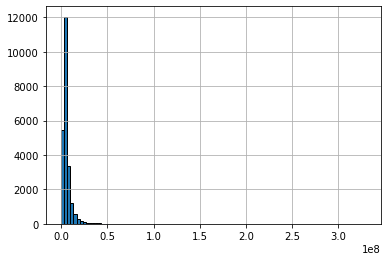

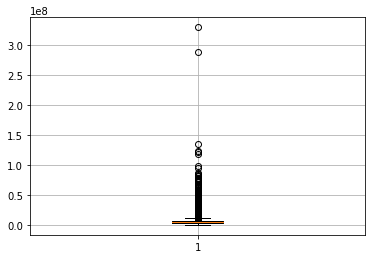

In [51]:
hist(df_adjusted['last_price'])
box(df_adjusted['last_price'])

In [52]:
np.nanquantile(df_adjusted['last_price'],0.99)

27530107.999999955

Анализ столбца last_price после удаления экстремально высоких значений столбца с площадью показал, что в датафрейме имеется несколько дорогих квартир (27,5 - 33 млн после 99-го квантиля). 

Поскольку эти значения в целом похожи на реальные (с учетом того, что в датафрейме остались квартиры площадью до 200 м2), удалять их не будем.

In [53]:
df_adjusted['rooms'].describe()

count    23462.000000
mean         2.033671
std          0.994623
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

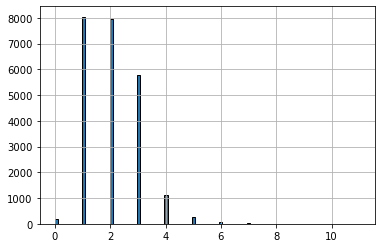

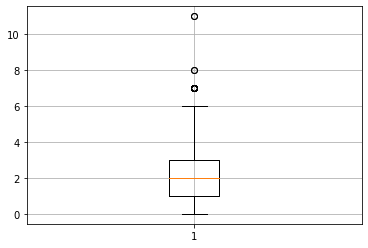

In [54]:
hist(df_adjusted['rooms'])
box(df_adjusted['rooms'])

In [55]:
df_adjusted.query('rooms==0')['total_area'].describe()

count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64

In [56]:
np.nanquantile(df_adjusted['rooms'],0.90)

3.0

В столбце с количеством комнат 196 строк с нулевым значением, что, судя по метражу, может означать студии. Имеется небольшое количество многокомнатных квартир (максимум 11) что похоже на правду.

In [57]:
df_adjusted['ceiling_height'].describe()

count    23462.000000
mean         2.720183
std          0.990786
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

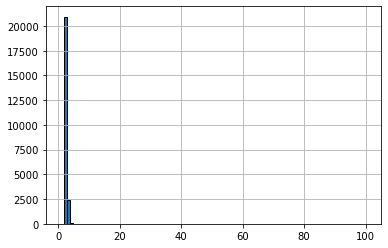

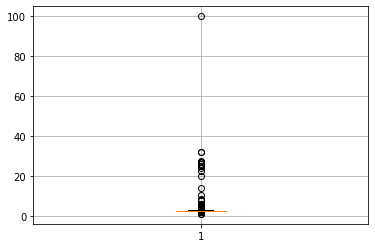

In [58]:
hist(df_adjusted['ceiling_height'])
box(df_adjusted['ceiling_height'])

In [59]:
top_threshold=np.nanquantile(df_adjusted['ceiling_height'],0.99)
top_threshold

3.55

In [60]:
bottom_threshold=np.nanquantile(df_adjusted['ceiling_height'],0.01)
bottom_threshold

2.5

Отбросим крайние значения ниже 2,5 метров и выше 3,55 метров

In [61]:
df_adjusted=df_adjusted[df_adjusted['ceiling_height']<top_threshold]
df_adjusted=df_adjusted[df_adjusted['ceiling_height']>bottom_threshold]
df_adjusted['ceiling_height'].describe()

count    19631.000000
mean         2.715191
std          0.168789
min          2.510000
25%          2.650000
50%          2.650000
75%          2.700000
max          3.540000
Name: ceiling_height, dtype: float64

**Изучение данных в колонке days_exposition**

In [62]:
df_adjusted['days_exposition'].describe()

count    17196.000000
mean       181.602756
std        220.050602
min          2.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

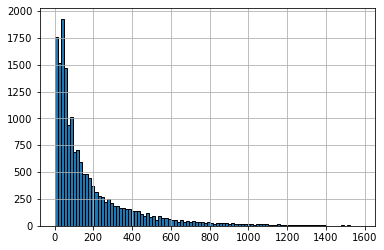

In [63]:
hist(df_adjusted['days_exposition'])


Нормальные значения для срока продажи квартиры - диапазон между 1 и 3 квартилями. То есть ситуации, когда квартира продается быстрее, чем за 45 дней или дольше, чем за 232 дня можно назвать нетипичными.

**Исследование факторов, влияющих на стоимость квартиры**

Для проверки на наличие корреляции, построим диаграммы рессеяния по значениям столбцов 'square_meter_price','total_area','rooms','citycenters_nearest'

In [64]:
df_for_scatters=df_adjusted[['square_meter_price','total_area','rooms','citycenters_nearest']]

array([[<AxesSubplot:xlabel='square_meter_price', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='citycenters_nearest', ylabel='square_meter_price'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='citycenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='citycenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='citycenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='citycenters_nearest'>,
        <AxesSubplot:xlabel

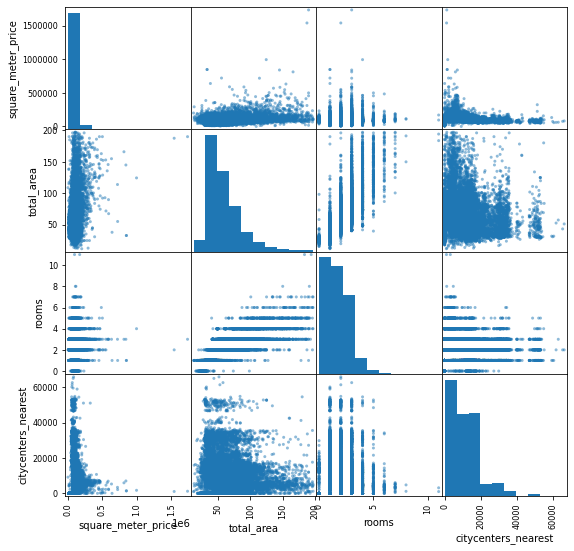

In [65]:
pd.plotting.scatter_matrix(df_for_scatters, figsize=(9, 9))

In [66]:
df_adjusted['square_meter_price'].corr(df_adjusted['total_area'])

0.24758331860790755

In [67]:
df_adjusted['square_meter_price'].corr(df_adjusted['rooms'])

0.008691948985361518

In [68]:
df_adjusted['square_meter_price'].corr(df_adjusted['citycenters_nearest'])

0.03773556640719708

Построим отдельные диаграммы рассеяния по отношению цены к общей площади и близости к центру города. Добавим параметр прозрачности.

Также построим диаграмму изменения цены у квартир с разным количествои комнат.

<AxesSubplot:xlabel='total_area', ylabel='square_meter_price'>

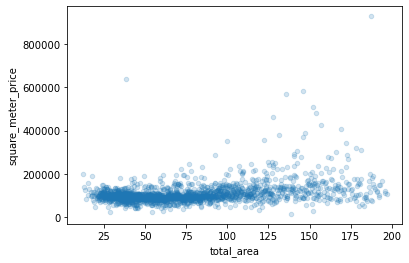

In [69]:
df_total_area = pd.DataFrame(df_adjusted.groupby('total_area')['square_meter_price'].median()).reset_index()
df_total_area.plot(x='total_area', y='square_meter_price', kind='scatter',alpha=0.2)

Явной зависимоти площади и цены не прослеживается, однако видно, что чем меньше площадь, тем меньше разброс в цене и большинство выпадающих значений цены у квартир с площадью от 100 м2 и более.

<AxesSubplot:xlabel='citycenters_nearest', ylabel='square_meter_price'>

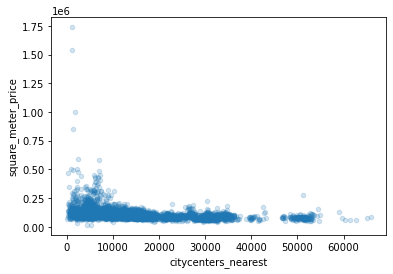

In [70]:
df_citycenters_nearest = pd.DataFrame(df_adjusted.groupby\
('citycenters_nearest')['square_meter_price'].median()).reset_index()
df_citycenters_nearest.plot(x='citycenters_nearest', y='square_meter_price', kind='scatter',alpha=0.2)

Корелляция расстояния от центра и цены не прослеживается, хотя по диаграмме рассеяния видно, что большая чать дороих квартир (250000 за метр и более) находятся в пределах 10 км от центра. 

<AxesSubplot:xlabel='rooms'>

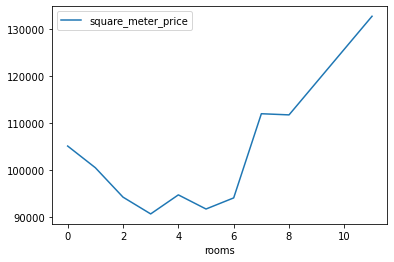

In [71]:
df_rooms = pd.DataFrame(df_adjusted.groupby('rooms')['square_meter_price'].median()).reset_index()
df_rooms.plot(x='rooms', y='square_meter_price')

Цена падает при увеличении количества комнат с ноля до трех, после чего тренд сменяется на противоположный. Это может объясняться тем, что квартиры до 3 комнат - массовый сегмент (в нашем датафрейме их 90%). Квартиры с большим количеством комнат скорее можно отнести к элитному жилью, где действует другая логика ценообразования (в нашем датафрейме таких 10 %)

**Зависимость цены от этажа, дня недели, месяца и года**

Найдем медианные значения цены за квадратный метр по каждой категории, а также построим диаграммы.

In [72]:
df_adjusted.groupby('floor_type')['square_meter_price'].median()

floor_type
first    81993.569132
last     88948.787062
other    99540.581930
Name: square_meter_price, dtype: float64

<AxesSubplot:xlabel='floor_type'>

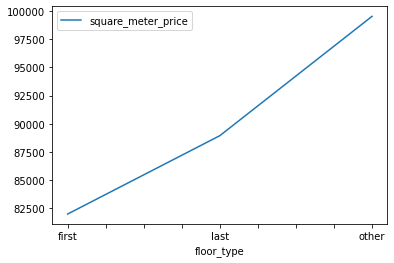

In [73]:
df_floor = pd.DataFrame(df_adjusted.groupby('floor_type')['square_meter_price'].median()).reset_index()
df_floor.plot(x='floor_type', y='square_meter_price')

Зависимость цены квартиры и этажа, на котором она расположена есть: самые дешевые - квартиры на первых этажах, далее - на последних и выше всего цена у прочих квартир.

In [74]:
df_adjusted.groupby('weekday_exposition')['square_meter_price'].median()

weekday_exposition
0    96296.296296
1    96760.259179
2    96451.612903
3    96482.412060
4    95555.555556
5    95029.239766
6    95264.017420
Name: square_meter_price, dtype: float64

<AxesSubplot:xlabel='weekday_exposition'>

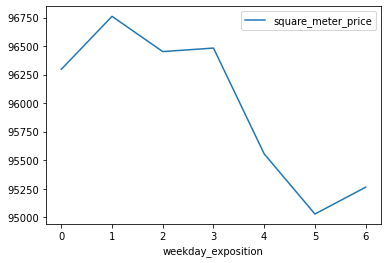

In [75]:
df_weekday_exposition = pd.DataFrame(df_adjusted.groupby\
('weekday_exposition')['square_meter_price'].median()).reset_index()
df_weekday_exposition.plot(x='weekday_exposition', y='square_meter_price')

День недели, в который было размещено объявление, на цену не влияет.

In [76]:
df_adjusted.groupby('month_exposition')['square_meter_price'].median()

month_exposition
1     96764.677895
2     95833.333333
3     97222.222222
4     97402.597403
5     93750.000000
6     93777.777778
7     96244.131455
8     97174.479084
9     97222.222222
10    95526.315789
11    96250.000000
12    95384.615385
Name: square_meter_price, dtype: float64

<AxesSubplot:xlabel='month_exposition'>

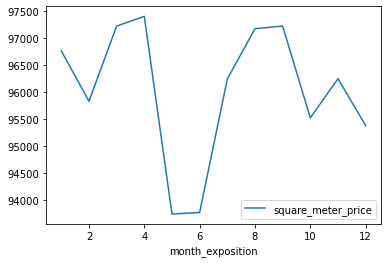

In [77]:
df_month_exposition = pd.DataFrame(df_adjusted.groupby\
('month_exposition')['square_meter_price'].median()).reset_index()
df_month_exposition.plot(x='month_exposition', y='square_meter_price')

Месяц, в который было размещено объявление, на цену не влияет.

In [78]:
df_adjusted.groupby('year_exposition')['square_meter_price'].median()

year_exposition
2014    113774.238965
2015     93647.887324
2016     92857.142857
2017     93551.740326
2018     97466.666667
2019    105820.105820
Name: square_meter_price, dtype: float64

<AxesSubplot:xlabel='year_exposition'>

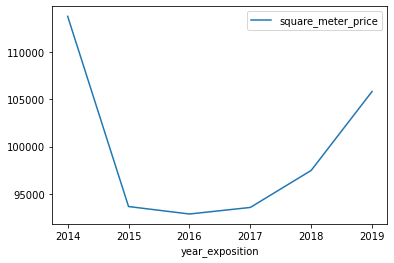

In [79]:
df_year_exposition = pd.DataFrame(df_adjusted.groupby('year_exposition')['square_meter_price'].median()).reset_index()
df_year_exposition.plot(x='year_exposition', y='square_meter_price')

От года размещения зависит цена за квадратный метр. В масштабе года становится заметна динамика изменения цен: резкий спад после 2014 года и последующий постепенный рост. 

**Анализ десяти населённых пунктов с наибольшим числом объявлений**

In [80]:
df_rating = df_adjusted.pivot_table(index='locality_name', values='square_meter_price',\
aggfunc=['count', 'mean']).sort_values(by=('count', 'square_meter_price'), ascending=False).head(10)
df_rating=df_rating.sort_values(by=('mean', 'square_meter_price'), ascending=False)
df_rating

,count,mean
,square_meter_price,square_meter_price
locality_name,,
Санкт-Петербург,13158,115145.719728
Пушкин,280,104383.996638
деревня Кудрово,298,92455.349950
посёлок Парголово,311,90272.963303
посёлок Мурино,512,85642.107405
посёлок Шушары,410,78630.463087
Колпино,233,75222.483947
Гатчина,234,69060.076053


Топ 10 населенных пунктов по цене среди первой десятки по общему количеству объявлений возглавляет Санкт_петербург - 115145  руб, на последнем месте в списке Выборг 58589 руб.

**Анализ изменения цены по степени удалённости от центра**

In [81]:
df_adjusted['citycenters_nearest_km']=df_adjusted['citycenters_nearest']/1000

In [82]:
df_adjusted['citycenters_nearest_km']=df_adjusted['citycenters_nearest_km'].astype(int)
df_adjusted[['citycenters_nearest','citycenters_nearest_km']].head()

,citycenters_nearest,citycenters_nearest_km
0,16028.0,16
1,18603.0,18
2,13933.0,13
3,6800.0,6
4,8098.0,8


In [83]:
df_spb=df_adjusted[df_adjusted['locality_name']=='Санкт-Петербург']
df_spb['locality_name'].describe()

count               13158
unique                  1
top       Санкт-Петербург
freq                13158
Name: locality_name, dtype: object

    square_meter_price  citycenters_nearest_km
0        159607.789879                       0
1        162071.655912                       1
2        135962.712684                       2
3        122263.636752                       3
4        135729.732589                       4
5        144160.797848                       5
6        150673.656665                       6
7        141603.542316                       7
8        121249.946359                       8
9        111773.967497                       9
10       113596.525029                      10
11       107474.920683                      11
12       109252.716380                      12
13       108161.826421                      13
14       106109.296114                      14
15       103585.105371                      15
16       102008.517845                      16
17        95189.025548                      17
18        96735.692342                      18
19        95024.279439                      19
20       1085

<AxesSubplot:xlabel='citycenters_nearest_km'>

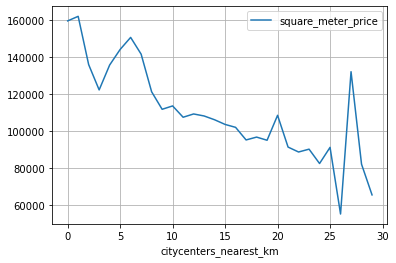

In [84]:
price_per_km_citycenter = df_spb.pivot_table\
(index='citycenters_nearest_km', values='square_meter_price', aggfunc='mean')
price_per_km_citycenter['citycenters_nearest_km']=price_per_km_citycenter.index
price_per_km_citycenter.reset_index(drop=True, inplace=True)
print(price_per_km_citycenter)

price_per_km_citycenter.plot(x='citycenters_nearest_km',y='square_meter_price', grid=True)

На графике видно, что по мере отдаления от центра средняя цена за квадратный метр падает до расстояния 3 километров, после чего тренд меняется на противоположный. Можно предположить что начиная с расстояния от центра Санкт-Петербурга в 3 км и выше близость к центру уже не так сильно влияет на цену. Таким образом центральную часть города можно ограничить 3 километрами от центра.

**Сравнение выводов по квартирам в центре и общих выводов по всей базе**

In [85]:
df_spb_center=df_spb[df_spb['citycenters_nearest_km']<=3]


count    1032.000000
mean       87.233702
std        37.319641
min        12.000000
25%        60.000000
50%        80.650000
75%       109.175000
max       197.000000
Name: total_area, dtype: float64


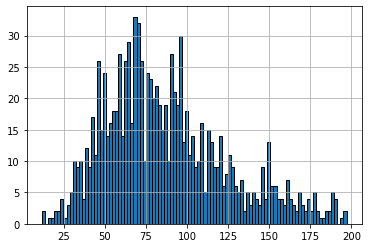

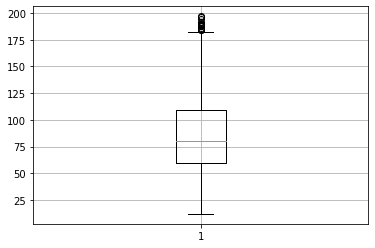

In [86]:
print(df_spb_center['total_area'].describe())
hist(df_spb_center['total_area'])
box(df_spb_center['total_area'])



count    1.032000e+03
mean     1.235730e+07
std      1.656661e+07
min      2.100000e+06
25%      6.780000e+06
50%      9.000000e+06
75%      1.300000e+07
max      3.300000e+08
Name: last_price, dtype: float64


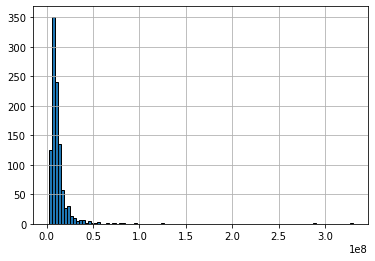

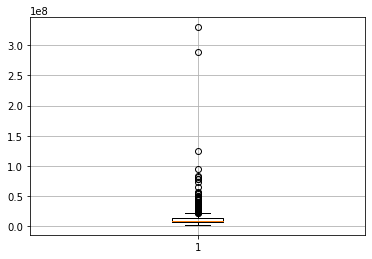

In [87]:
print(df_spb_center['last_price'].describe())
hist(df_spb_center['last_price'])
box(df_spb_center['last_price'])



count    1032.000000
mean        2.924419
std         1.343918
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: rooms, dtype: float64


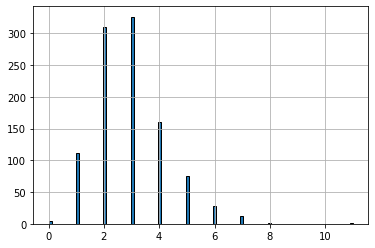

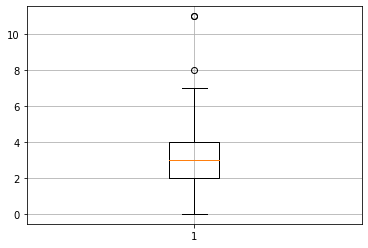

In [88]:
print(df_spb_center['rooms'].describe())
hist(df_spb_center['rooms'])
box(df_spb_center['rooms'])



count    1032.000000
mean        2.932665
std         0.285410
min         2.550000
25%         2.650000
50%         2.900000
75%         3.200000
max         3.540000
Name: ceiling_height, dtype: float64


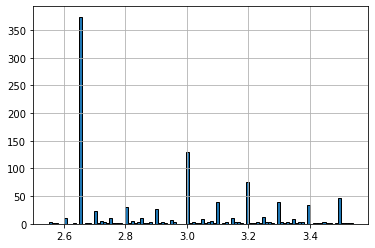

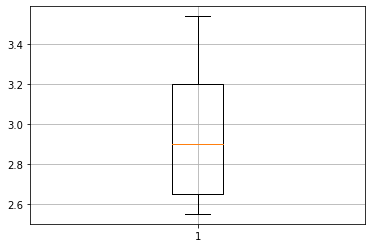

In [89]:
print(df_spb_center['ceiling_height'].describe())
hist(df_spb_center['ceiling_height'])
box(df_spb_center['ceiling_height'])



In [90]:
spb_center_rooms = pd.DataFrame(df_spb_center.groupby('rooms')['square_meter_price'].median()).reset_index()

In [91]:
df_spb_center['rooms'].describe()

count    1032.000000
mean        2.924419
std         1.343918
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: rooms, dtype: float64

In [92]:
np.nanquantile(df_spb_center['rooms'],0.95)

5.0

In [93]:
spb_center_floor = pd.DataFrame(df_spb_center.groupby\
('floor_type')['square_meter_price'].median()).reset_index()
#spb_center_floor.plot(x='floor_type', y='square_meter_price')

In [94]:
spb_center_citycenters_nearest_km = pd.DataFrame\
(df_spb_center.groupby('citycenters_nearest_km')['square_meter_price'].median()).reset_index()

In [95]:
spb_center_year_exposition = pd.DataFrame\
(df_spb_center.groupby('year_exposition')['square_meter_price'].median()).reset_index()

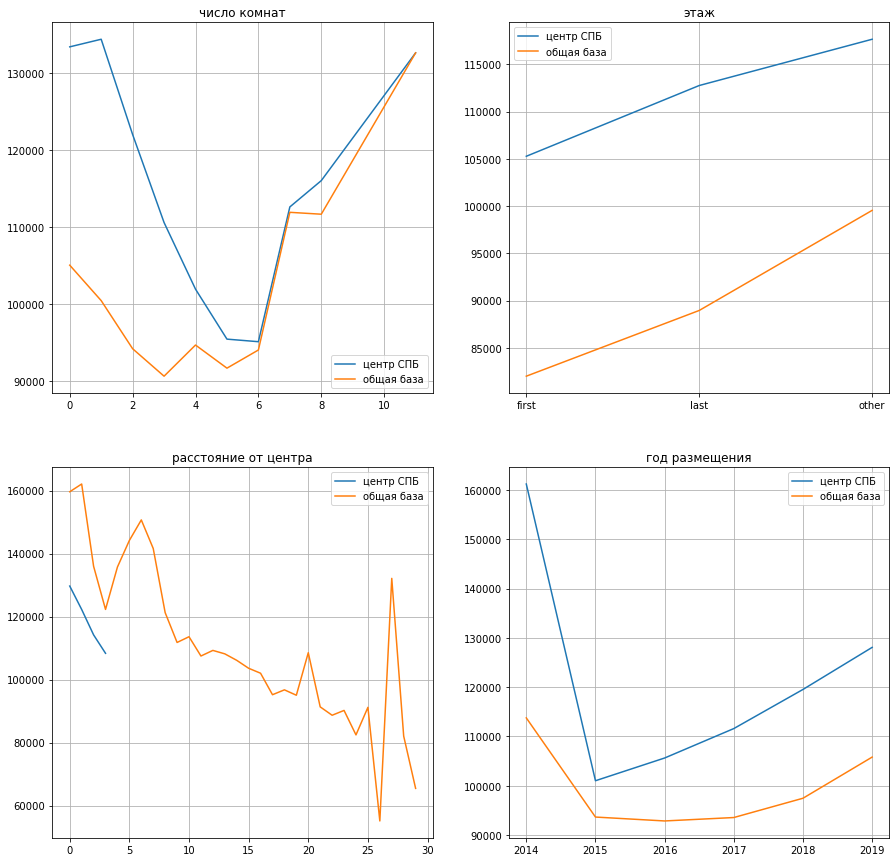

In [96]:

fig,ax=plt.subplots(2,2,figsize=(15,15),sharey=False)

ax[0,0].set_title('число комнат')
ax[0,0].plot(spb_center_rooms['rooms'], spb_center_rooms['square_meter_price'],color='C0',label = 'центр СПБ')
ax[0,0].plot(df_rooms['rooms'],df_rooms['square_meter_price'],color='C1',label = 'общая база')
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].set_title('этаж')
ax[0,1].plot(spb_center_floor['floor_type'],spb_center_floor['square_meter_price'],color='C0',label = 'центр СПБ')
ax[0,1].plot(df_floor['floor_type'],df_floor['square_meter_price'],color='C1',label = 'общая база')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].set_title('расстояние от центра')
ax[1,0].plot(spb_center_citycenters_nearest_km['citycenters_nearest_km'],spb_center_citycenters_nearest_km['square_meter_price'],color='C0',label = 'центр СПБ')
ax[1,0].plot(price_per_km_citycenter['citycenters_nearest_km'],price_per_km_citycenter['square_meter_price'],color='C1',label = 'общая база')
ax[1,0].grid()
ax[1,0].legend()

ax[1,1].set_title('год размещения')
ax[1,1].plot(spb_center_year_exposition['year_exposition'],spb_center_year_exposition['square_meter_price'],color='C0',label = 'центр СПБ')
ax[1,1].plot(df_year_exposition['year_exposition'],df_year_exposition['square_meter_price'],color='C1',label = 'общая база')
ax[1,1].grid()
ax[1,1].legend()
plt.show()

Как и в основном датафрейме цена за метр падает с увеличением количества комнат, но в отличие от основного датафрейма не до 3, а до 5(95% всех квартир имеют до 5 комнат). 

В данных по центру Санкт-Петербурга, как и в общей базе самый большой дисконт по сравнению с квартирами из категории "не первый и не последний этаж" у квартир на первом этаже, далее - на последнем.

У квартир в центральной части Санкт-Петербурга наблюдается отрицательная зависимость цены и удаленности от центра. На общем датафрейме такой зависимости нет.

Как и в общем датафрейме - в данных по центраьному Санкт-Петербургу есть цена зависит от года - после 2014 года наблюдается резкий спад и постепенное восстановление начиная с 2015 года.

## Общий вывод

Общими факторами, влияющими на цену квартиры, характерными как для всех квартир в базе, так и квартир, расположенных в центре Санкт-Петербурга являются:

    - год продажи - средняя цена повтряет общие тенденции рынка (кризис 2014 года и постепенное восстановление);
    
    - последний этаж снижает цену в примерно на 5 %, первый до 10% от цены за метр квартир на средних этажах;
    
    - увеличение количества комнат в массовом сегменте (примерно для 90% квартир) сопровождается снижением цены за квадратный метр.
    
Для квартир в центра Санкт-Петербурга также прослеживается отрицательная зависимость цены и удаленногсти от центра примерно до 3 км от центра. В общей базе такой зависимости не прослеживается.